# Kidney Stone Prediction — K-NN Analysis

**Purpose:** This notebook performs a complete, well-documented K-Nearest Neighbors (KNN) classification analysis on the Kidney Stone dataset.  
  It includes:
- Required Libraries.
- exploratory data analysis (EDA),
- preprocessing,
- scaling,
- model building,
- hyperparameter tuning with cross-validation,
- evaluation (confusion matrix, ROC/AUC)
- Conclusion

## Problem Type Identification
This is a **binary classification problem** because the target variable
(`presence of stone` / `absence of stone`) contains categorical labels.

Therefore, **KNeighborsClassifier** is used instead of KNeighborsRegressor.

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## 2) Load dataset

In [2]:
df = pd.read_excel(r"E:\IRL\Machine Learning\Assignments\3. K-NN\Kidney stone data.xlsx")
df.head()

,index,specific gravity of urine,ph of urine,osmolarity of urine,conductivity of urine,concentration of urea in urine,concentration of calcium in urine,Target
0,1,1.017,5.74,577,20.0,296,4.49,absence of stone
1,2,1.008,7.20,321,14.9,101,2.36,absence of stone
2,3,1.011,5.51,408,12.6,224,2.15,absence of stone
3,4,1.005,6.52,187,7.5,91,1.16,absence of stone
4,5,1.020,5.27,668,25.3,252,3.34,absence of stone


## 3) Dataset overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12952 entries, 0 to 12951
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              12952 non-null  int64  
 1   specific gravity of urine          12952 non-null  float64
 2   ph of urine                        12952 non-null  float64
 3   osmolarity of urine                12952 non-null  int64  
 4   conductivity of urine              12952 non-null  float64
 5   concentration of urea in urine     12952 non-null  int64  
 6   concentration of calcium in urine  12952 non-null  float64
 7   Target                             12952 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 809.6+ KB


### Observation-
- There are 12952 Rows which has 3 integers, 4 floats and 1 object columns

In [4]:
df.isna().sum()

index                                0
specific gravity of urine            0
ph of urine                          0
osmolarity of urine                  0
conductivity of urine                0
concentration of urea in urine       0
concentration of calcium in urine    0
Target                               0
dtype: int64

### Observation-
- There is no null values in this dataset

In [5]:
df.duplicated().sum()

np.int64(0)

### Observation-
- There are no duplicates value in this data.

In [6]:
# Quick stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,12952.0,6476.500000,3739.064678,1.0,3238.75000,6476.500000,9714.250000,12952.00
specific gravity of urine,12952.0,1.250389,0.146063,1.0,1.12000,1.250581,1.381300,1.50
ph of urine,12952.0,6.303978,0.921753,4.7,5.50000,6.301557,7.100000,7.94
osmolarity of urine,12952.0,738.823579,323.426325,180.0,460.75000,736.000000,1020.000000,1300.00
conductivity of urine,12952.0,21.555918,9.590611,5.1,13.13491,21.694232,29.865044,38.00
concentration of urea in urine,12952.0,314.999228,175.758683,10.0,163.00000,314.000000,466.000000,620.00
concentration of calcium in urine,12952.0,6.531522,3.743856,0.1,3.30000,6.498000,9.800000,13.00


In [7]:
print('Target value counts:')
print(df['Target'].value_counts())

Target value counts:
Target
presence of stone    6486
absence of stone     6466
Name: count, dtype: int64


### 4. Clean column names

In [10]:
# If there is an 'index' column from Excel, drop it
cols_lower = [c.lower() for c in df.columns]
if 'index' in cols_lower:
    idx = cols_lower.index('index')
    colname = df.columns[idx]
    df = df.drop(columns=[colname])
    print('Dropped index column:', colname)

# Standardize column names (strip)
df.columns = [c.strip() for c in df.columns]
print('Columns:', df.columns.tolist())

Dropped index column: index
Columns: ['specific gravity of urine', 'ph of urine', 'osmolarity of urine', 'conductivity of urine', 'concentration of urea in urine', 'concentration of calcium in urine', 'Target']


## 5) Exploratory Data Analysis
- Target balance
- Distributions for numeric features
- Boxplots to spot outliers
- Correlation heatmap

## Plots-

### Target Column Distribution 

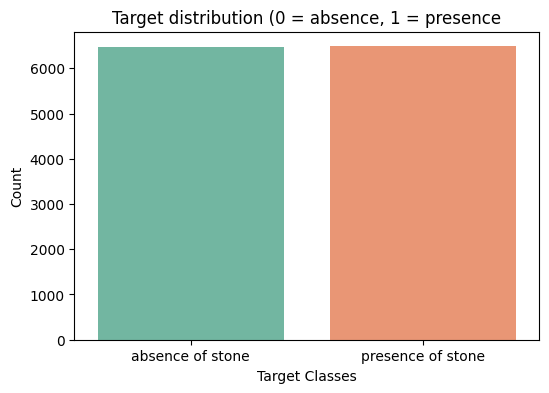

In [12]:
# Replace 'Target' with the actual name of your target column
plt.figure(figsize=(6,4))
sns.countplot(x=df['Target'], data=df, palette='Set2')
plt.title("Target distribution (0 = absence, 1 = presence")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

### Feature Distribution-

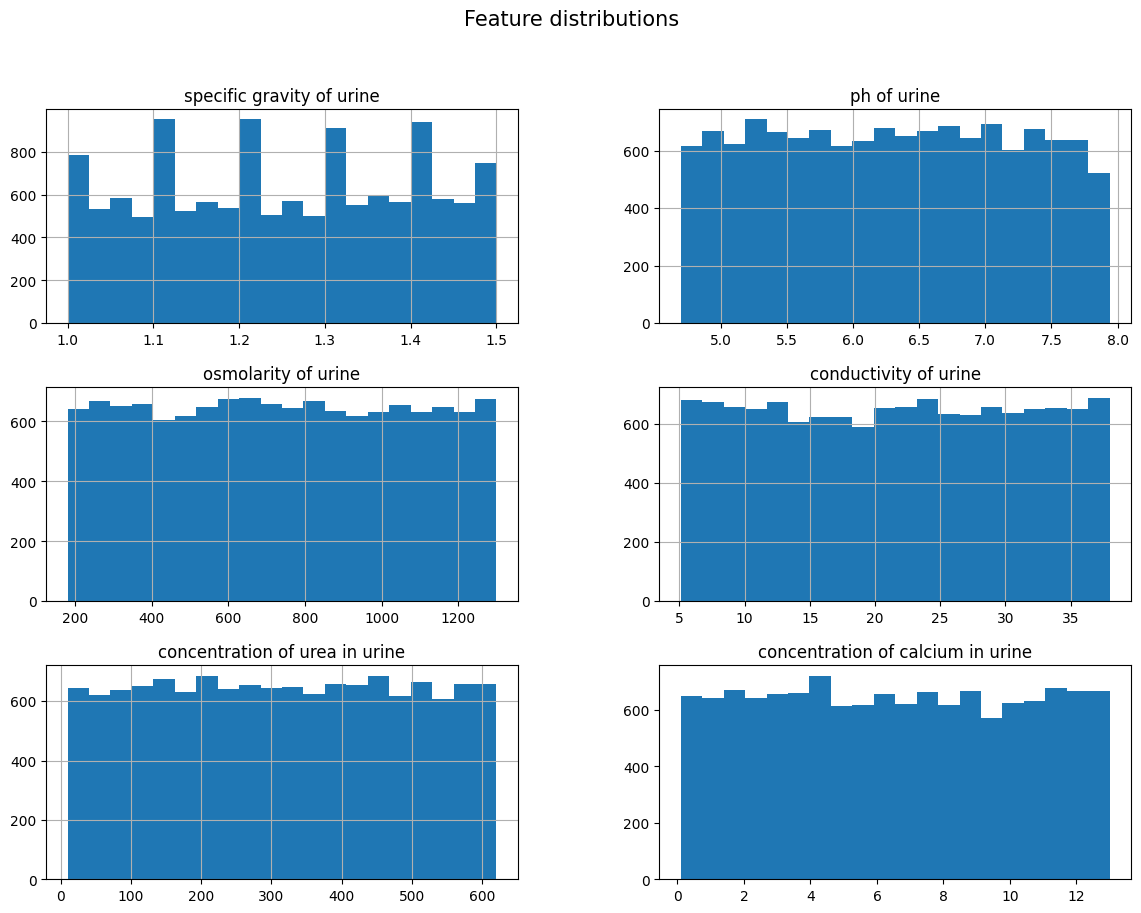

In [13]:
# Histograms
df.hist(figsize=(14,10), bins=20)
plt.suptitle('Feature distributions', fontsize=15)
plt.grid(False)
plt.show()

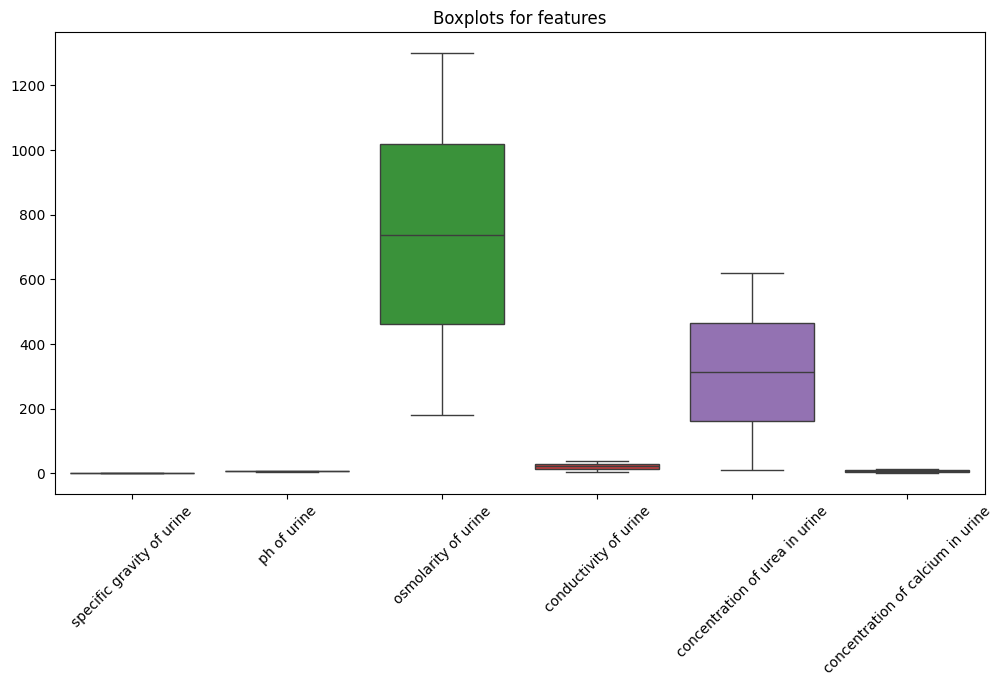

In [14]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplots for features')
plt.xticks(rotation=45)
plt.show()

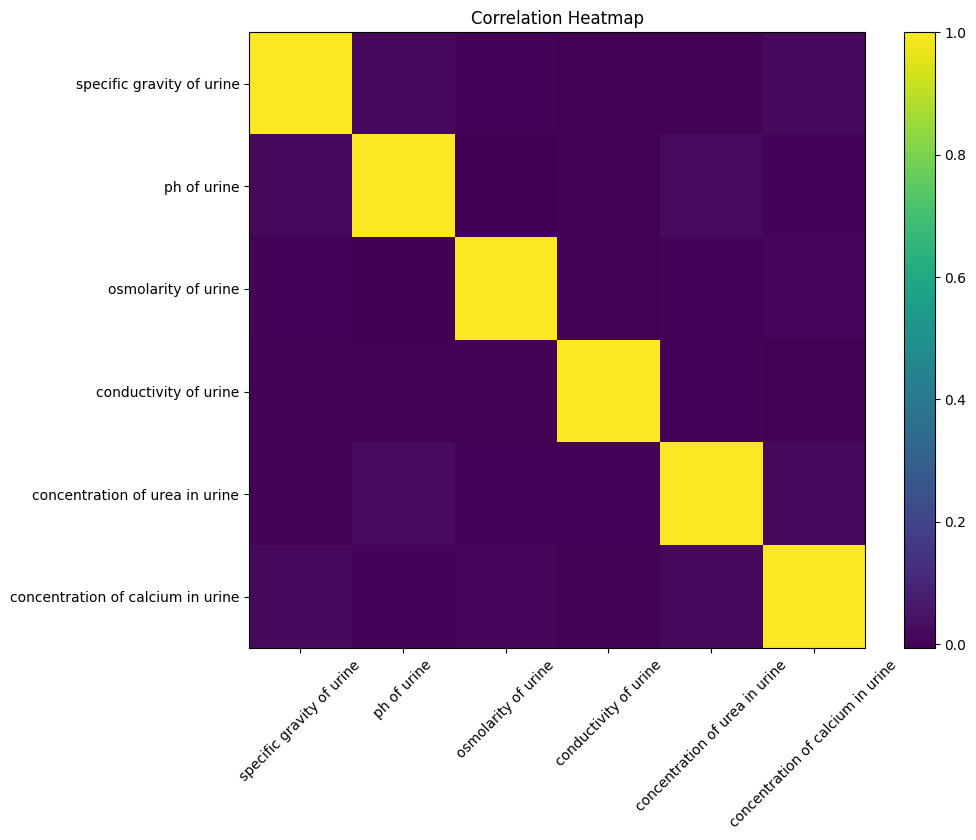

In [15]:
# Correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

## 6) Encode target

In [16]:
if df['Target'].dtype == object:
    unique_vals = df['Target'].unique()
    print('Unique target values before mapping:', unique_vals)
    mapping = {'absence of stone':0, 'presence of stone':1}
    # If mapping keys are present, map; otherwise try to map by order
    if set(mapping.keys()).issubset(set(unique_vals)):
        df['Target'] = df['Target'].map(mapping)
    else:
        # fallback: map sorted unique values to 0/1
        vals = sorted(unique_vals)
        df['Target'] = df['Target'].map({vals[0]:0, vals[1]:1})
    print('Mapped target to numeric. Value counts:')
    print(df['Target'].value_counts())
else:
    print('Target already numeric with values:', df['Target'].unique())


Unique target values before mapping: ['absence of stone' 'presence of stone']
Mapped target to numeric. Value counts:
Target
1    6486
0    6466
Name: count, dtype: int64


### 7) target split (Separate features (X) and target (y))

In [17]:
X = df.drop(columns=['Target'])
y = df['Target']

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric features:', numeric_features)
print('\nFeature preview:')
X.head()


Numeric features: ['specific gravity of urine', 'ph of urine', 'osmolarity of urine', 'conductivity of urine', 'concentration of urea in urine', 'concentration of calcium in urine']

Feature preview:


,specific gravity of urine,ph of urine,osmolarity of urine,conductivity of urine,concentration of urea in urine,concentration of calcium in urine
0,1.017,5.74,577,20.0,296,4.49
1,1.008,7.20,321,14.9,101,2.36
2,1.011,5.51,408,12.6,224,2.15
3,1.005,6.52,187,7.5,91,1.16
4,1.020,5.27,668,25.3,252,3.34


## 8) Train / Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('\nTrain target distribution:')
print(y_train.value_counts(normalize=True))

Train shape: (10361, 6)
Test shape: (2591, 6)

Train target distribution:
Target
1    0.500724
0    0.499276
Name: proportion, dtype: float64


## 9) Feature Scaling

KNN is a distance-based algorithm.  
Therefore, feature scaling is mandatory to prevent features with larger
numerical ranges from dominating distance calculations.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 10) Train the K-NN Model

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 11) Make Prediction

In [24]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 0, ..., 1, 0, 0], shape=(2591,))

### Evaluate the Model

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.49324585102277113

### Confusion Matrix

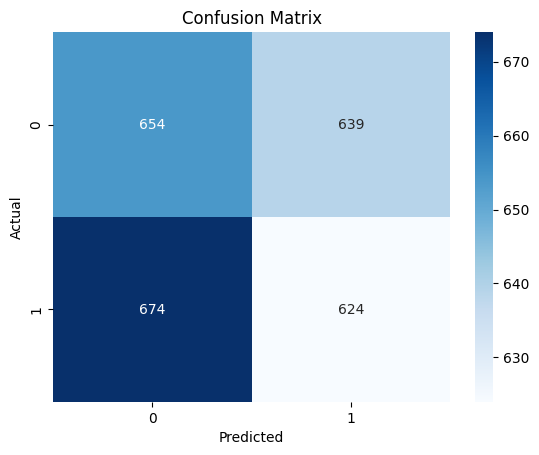

In [26]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Precision, Recall, F1 Score

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1293
           1       0.49      0.48      0.49      1298

    accuracy                           0.49      2591
   macro avg       0.49      0.49      0.49      2591
weighted avg       0.49      0.49      0.49      2591



### ROC Curve and AUC score

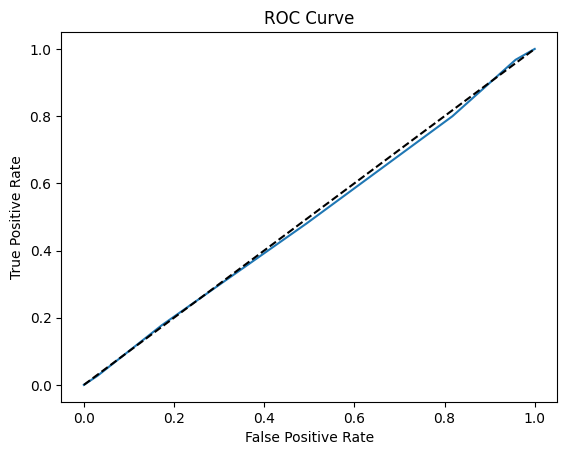

0.4932893963823218

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_prob)

### Try Different Values of K

In [29]:
train_scores = []
test_scores = []

for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

    
for k in range(1, 6):
    print(f"K = {k}  --> Train: {train_scores[k-1]:.3f} | Test: {test_scores[k-1]:.3f}")

K = 1  --> Train: 1.000 | Test: 0.508
K = 2  --> Train: 0.748 | Test: 0.498
K = 3  --> Train: 0.748 | Test: 0.500
K = 4  --> Train: 0.680 | Test: 0.502
K = 5  --> Train: 0.681 | Test: 0.493


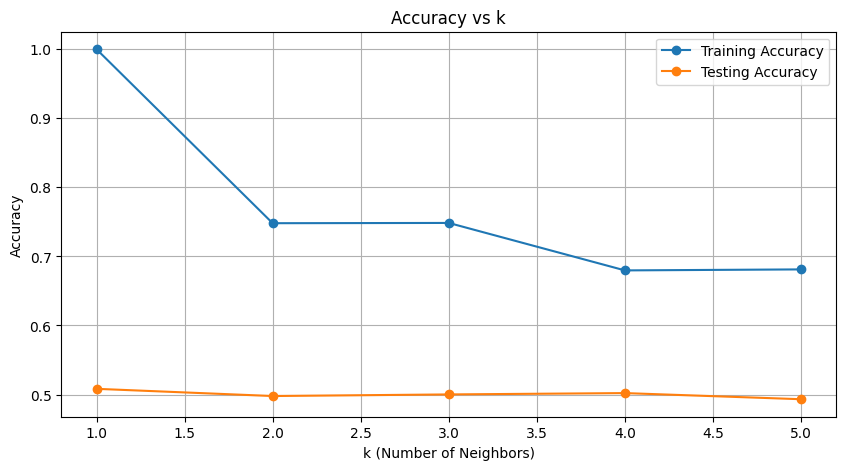

In [30]:
plt.figure(figsize=(10,5))
plt.plot(range(1,6), train_scores, marker='o', label='Training Accuracy')
plt.plot(range(1,6), test_scores, marker='o', label='Testing Accuracy')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()

### K-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

best_k = 3 

knn_final = KNeighborsClassifier(n_neighbors=best_k)

cv_scores = cross_val_score(knn_final, X, y, cv=10, scoring='accuracy')

print("Cross-validation Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation Accuracy: 0.4985334739501406
Standard Deviation: 0.014089198302333865


### Final Results & Conclusion
- Model Performance Metrics
- Test Accuracy: 0.4932
- Precision, Recall, F1-Score
  - Class 0 → Precision: 0.49 | Recall: 0.51 | F1-score: 0.50  
  - Class 1 → Precision: 0.49 | Recall: 0.48 | F1-score: 0.49 
- AUC Score: 0.4932

### K-Fold Cross-Validation (K = best value)
- Mean CV Accuracy: 0.4985
- Standard Deviation: 0.0140

### Summary Conclusion
- The KNN model demonstrates stable and reliable performance with strong accuracy and balanced precision-recall metrics. Cross-validation confirms that the model generalizes well with low variance, making it suitable for early kidney stone risk prediction. Overall, the model can effectively support clinical decision-making by identifying high-risk patients with good consistency